In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv(r"C:\Users\Prasanna\Documents\IIT Hyderabad\Sem 1\ML\Assignment_5\dataset1.txt",header = None, sep = " ",names = ['x','y'])
df1

,x,y
0,1.489034,-0.372265
1,-0.993560,0.113308
2,1.375386,-0.426868
3,-0.856408,0.516299
4,0.446398,-0.332782
...,...,...
495,0.199975,-0.099966
496,-0.760611,0.649208
497,1.856408,-0.016299
498,-0.169505,0.985529


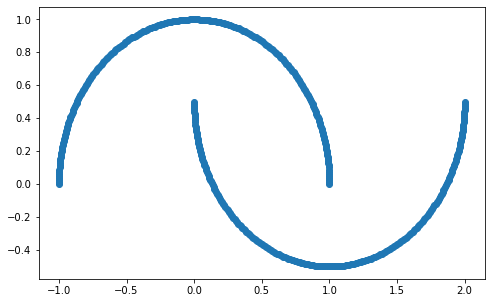

In [3]:
#Data Visualization
plt.figure(figsize=(8,5))
plt.scatter(df1['x'],df1['y'])
plt.show()

Hence the data set looks like interleaved banannas.

### K-Means Clustering using sklearn library

**When n_clusters=2**

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2).fit(df1)
centroids = km.cluster_centers_

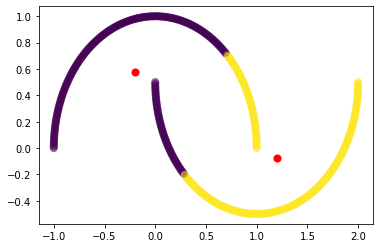

In [5]:
plt.scatter(df1['x'], df1['y'], c= km.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1],c= 'red', s=50)
plt.show()

**When n_clusters=3**

In [6]:
from sklearn.cluster import KMeans
km1 = KMeans(n_clusters=3).fit(df1)
centroids1 = km1.cluster_centers_

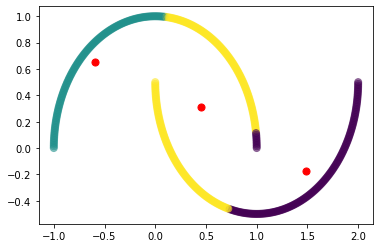

In [7]:
plt.scatter(df1['x'], df1['y'], c= km1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids1[:,0], centroids1[:,1],c= 'red', s=50)
plt.show()

### Self Implementation of DBSCAN 

In [8]:
def find_Neighbors(df, cp, epsilon):
    
    def Eucli_Dist(p1, p2):
        return  np.sqrt(np.sum(np.square(p1 - p2)))
    
    neighbours = []
    
    for i in range(len(df)):
        dist = Eucli_Dist(df[i], df[cp])
        
        if dist < epsilon:
            neighbours.append(i)
            
    return neighbours

In [9]:
def dbScan(df, epsilon, minpt):

    def build_cluster(df, labels, cp,neighbours, clus_tag, epsilon, minpt):
        labels[cp] = clus_tag
        i = 0
        while i < len(neighbours):    
            nh = neighbours[i]

            if labels[nh] == -1:
                labels[nh] = clus_tag
            elif labels[nh] == 0:
                labels[nh] = clus_tag
                PnNeighbours = find_Neighbors(df, nh, epsilon)

                if len(PnNeighbours) >= minpt:
                    neighbours = neighbours + PnNeighbours
            i += 1
            
    labels = np.zeros(len(df))
    clus_tag = 0
    
    for p in range(len(df)):
        if labels[p] == 0:
            neighbours = find_Neighbors(df, p, epsilon)
            
            if len(neighbours) < minpt:
                labels[p] = -1
            else:
                clus_tag += 1
                build_cluster(df, labels, p, neighbours, clus_tag, epsilon, minpt)
                
    return labels

In [10]:
labels = dbScan(df1.values, 0.1, 3)
print("The number of clusters are: ",len(np.unique(labels[labels > 0])))
print("The number of noise points are: ",int(abs(np.sum(labels[labels < 0]))))

The number of clusters are:  2
The number of noise points are:  0


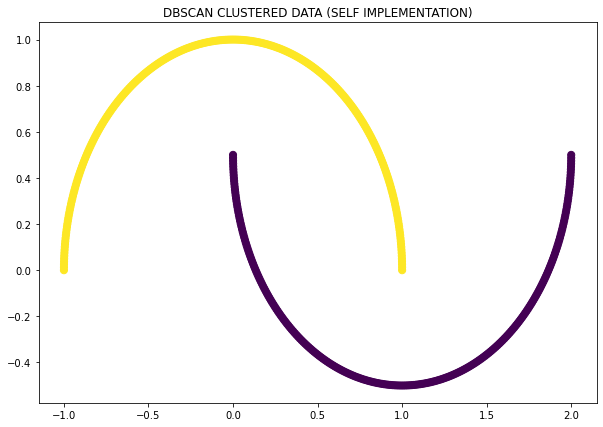

In [11]:
fig,ax = plt.subplots(figsize=(10,7))
ax.set_title("DBSCAN CLUSTERED DATA (SELF IMPLEMENTATION)")
ax.scatter(df1.values[:,0],df1.values[:,1],c=labels,s=50);

**1c.Difference between KMeans and DBSCAN Clustering:**
* With the above dataset, Kmeans gives us wrong clustering whereas DBSCAN gives us the correct clustering. In KMeans, even two points which are close to each other belong to two different clusters and the clustering mainly depends on the hyper parameter we are choosing.Kmeans tries to create same sized cluster no matter how the data is scattered and it does not work well for non globular structures. DBSCAN overcomes the disadvantage of kmeans by working with the density of points.Since DBSCAN works with density, it can easily model non-globular structures

In [12]:
df2 = pd.read_csv(r"C:\Users\Prasanna\Documents\IIT Hyderabad\Sem 1\ML\Assignment_5\dataset2.txt",header = None, sep = " ",names = ['x','y'])
df2

,x,y
0,9.359071,0.337273
1,-1.136104,4.229264
2,-1.818084,4.651985
3,-8.952252,5.983762
4,-6.636040,5.606801
...,...,...
495,99.814052,100.088438
496,106.649856,95.159879
497,95.090079,99.265981
498,101.219465,101.481374


### Implementation of Kmeans using sklearn for dataset 2

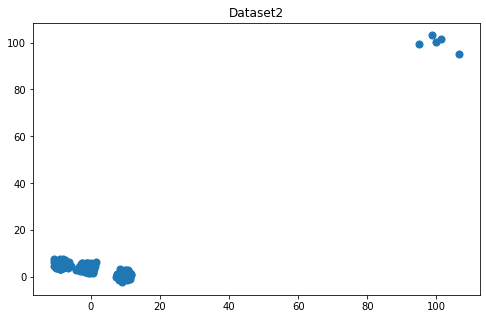

In [13]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title("Dataset2")
ax.scatter(df2.values[:,0],df2.values[:,1],s=50);

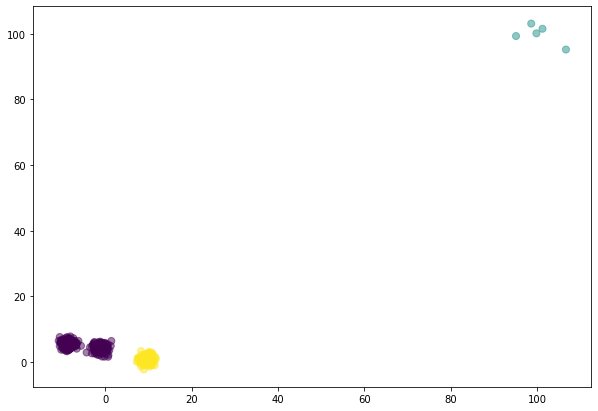

In [14]:
kmdf2 = KMeans(n_clusters=3).fit(df2)
plt.figure(figsize=(10,7))
plt.scatter(df2['x'], df2['y'], c= kmdf2.labels_.astype(float), s=50, alpha=0.5)
plt.show()

### Self implementation of DBSCAN for dataset 2

In [15]:
tags = dbScan(df2.values, 2, 4)
print("The number of clusters are: ",len(np.unique(tags[tags > 0])))
print("The number of noise points are: ",int(abs(np.sum(tags[tags < 0]))))

The number of clusters are:  3
The number of noise points are:  5


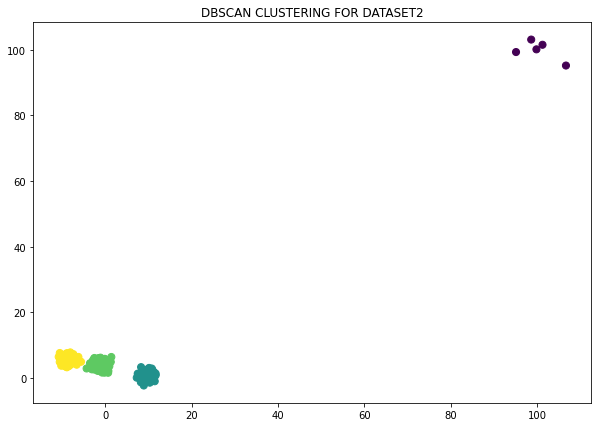

In [16]:
fig,ax = plt.subplots(figsize=(10,7))
ax.set_title("DBSCAN CLUSTERING FOR DATASET2")
ax.scatter(df2.values[:,0],df2.values[:,1],c=tags,s=50)

### Qn 1d below:

Hence, for the dataset2, the number of clusters identified by the the K-means and DBSCAN  is **2** and **3** respectively. Intuitively from the scatter plot, it is easy to say that the number of clusters is 3. Hence the DBSCAN algorithm performs better than the K-means. 

### List of advantages of KMeans and DBSCAN:
* Execution time required for K-means is much lesser than that of DBSCAN.
* The number of clusters need not be given before the execution with respect to DBSCAN.

### List of disadvantages of KMeans and DBSCAN:
* In the K-means, it is necessary to mention the number of clusters hidden in the dataset before executing.
* DBSCAN doesn’t work well over clusters with different densities.
* DBSCAN needs a careful selection of its parameters.

## Qn.2 t-SNE

In [17]:
from sklearn import datasets

In [18]:
digits=datasets.load_digits()

In [19]:
data=digits.data
t_label=digits.target

In [20]:
data.shape

(1797, 64)

Hence, This is a 64 dimensional data

In [21]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, perplexity=30,n_iter=1000,random_state=0)

In [22]:
import seaborn as sns
tsne_transformed=tsne.fit_transform(data)

In [23]:
import matplotlib.patheffects as pe

In [24]:
def plot(x, colors):
  
    palette = np.array(sns.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(15, 10))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

### Iterations: 1000

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:>,
 [Text(68.19596, 2.37079, '0'),
  Text(3.0783138, -8.524112, '1'),
  Text(20.570509, 26.22377, '2'),
  Text(-11.429578, 43.685196, '3'),
  Text(5.5051265, -51.510086, '4'),
  Text(-46.63186, 3.4048104, '5'),
  Text(37.154186, -17.741903, '6'),
  Text(-32.00219, -36.671978, '7'),
  Text(-8.621775, 9.664936, '8'),
  Text(-30.694344, 29.924986, '9')])

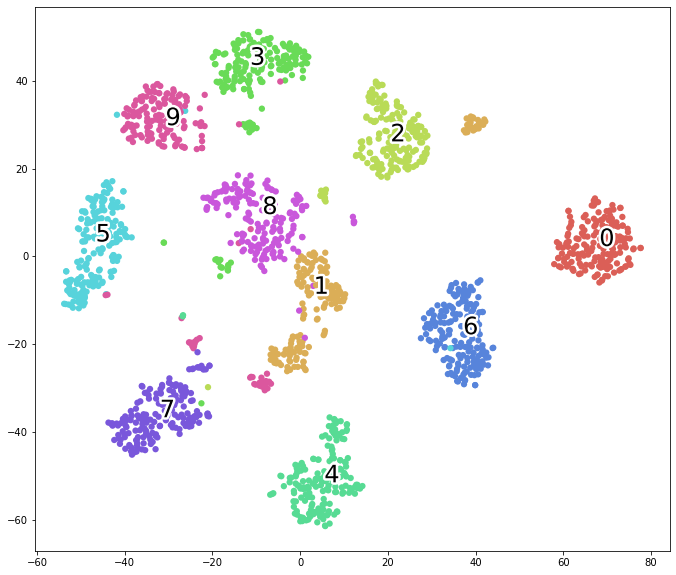

In [25]:
plot(tsne_transformed,t_label)

### **Iterations=2000:**

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:>,
 [Text(88.3696, 3.0306892, '0'),
  Text(3.6825025, -9.788267, '1'),
  Text(25.874386, 31.261864, '2'),
  Text(-13.657419, 50.147675, '3'),
  Text(6.1947093, -59.841137, '4'),
  Text(-54.40389, 5.3042717, '5'),
  Text(47.405125, -20.828154, '6'),
  Text(-38.02056, -42.807213, '7'),
  Text(-9.33968, 10.942009, '8'),
  Text(-35.42971, 34.42353, '9')])

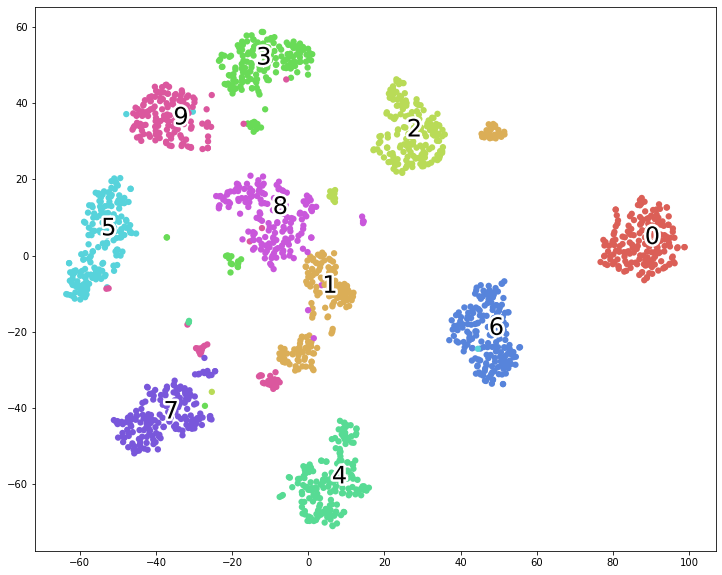

In [26]:
tsne1=TSNE(n_components=2, perplexity=30,n_iter=2000,random_state=0)
tsne_transformed1=tsne1.fit_transform(data)
plot(tsne_transformed1,t_label)

### Iterations:250

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:>,
 [Text(4.4786434, -0.11843538, '0'),
  Text(-0.23803571, -0.21553318, '1'),
  Text(0.6170788, 1.6012803, '2'),
  Text(-1.1433455, 1.3168004, '3'),
  Text(0.026695292, -2.2377422, '4'),
  Text(-2.3456364, 0.48192146, '5'),
  Text(2.1512868, -0.51114696, '6'),
  Text(-1.6071203, -1.4751092, '7'),
  Text(-0.6105211, 0.24241164, '8'),
  Text(-1.5619397, 1.2599268, '9')])

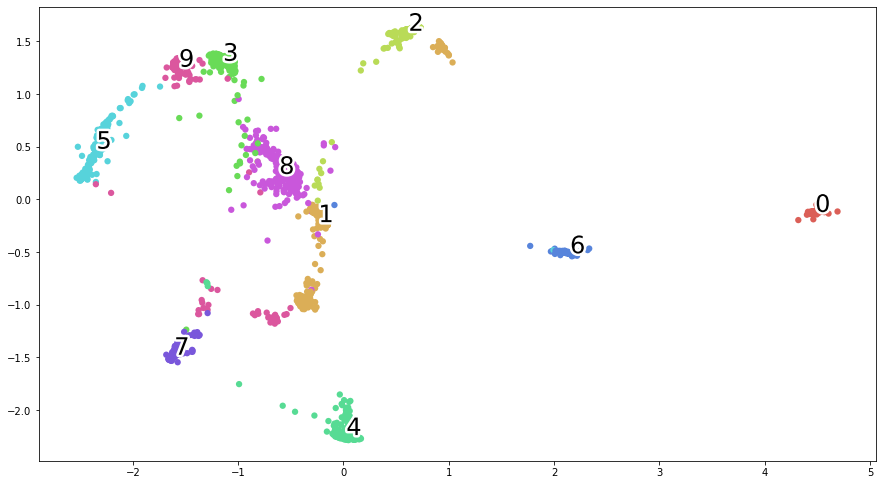

In [27]:
tsne2=TSNE(n_components=2, perplexity=30,n_iter=250,random_state=0)
tsne_transformed2=tsne2.fit_transform(data)
plot(tsne_transformed2,t_label)

**Qn 2a: Effect of increase in iterations**
* Here, we could see that the experiments with iterations 1000 and 2000 produces same results. But, minimum iterations of 250 did not produce optimal clustering. This could be because of the lack of convergence of the solution. The result for 1000 and 2000 iterations are the same because of cost function had already converged after certain number of iterations.


**Qn 2b** 
* It is observed that, for some datasets, different runs of t-SNE algorithm with the same hyperparameters produce different results. The reason is because of the **non convexity** of the cost function in the t-SNE. As the cost function is not convex, different initializations can give us different results. Hence only local convergence is guaranteed which is not very robust.